EDA PROINDUSTRIALES

In [1]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_excel('Proindustriales_Nuevo.xlsx')
data.head()

,Unnamed: 0,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,0,# 40213,# 3,2020-04-27,2020-04-27,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,100.0,100.0,35000,35000,0.00,3500000,3500000,2020-04-27
1,1,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,NaN,10.0,NaN,35000,35000,0.00,350000,350000,2020-04-27
2,2,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Pali,NaN,4.0,NaN,41000,41000,0.00,164000,164000,2020-04-27
3,3,# 40206,# 1,2020-04-23,2020-04-23,2020-04-23,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,5.0,5.0,35000,35000,0.00,175000,175000,2020-04-23
4,4,# 1078,# 1,2019-11-27,2019-11-27,2019-11-27,Alimentos y Bebidas,Alimentos preparados y conservados,Comprador Proveedor Prod 123 ASD,negociadorprod123@yopmail.com,compradorprod123@yopmail.com,Cra 123,Cra 123,NaN,Prepuesto 1,Comprador Prod 123 ASD,Recibido,Arroz Italiano,AZI132,2.0,2.0,56000,66640,10.64,107957,133280,2019-11-27


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.shape

(499, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO PEDIDO            499 non-null    object        
 1   ORDEN NÚMERO             499 non-null    object        
 2   FECHA ORDEN              499 non-null    datetime64[ns]
 3   FECHA ENTREGA            326 non-null    datetime64[ns]
 4   FECHA APROBACIÓN         434 non-null    datetime64[ns]
 5   CATEGORÍA                499 non-null    object        
 6   SUBCATEGORÍA             499 non-null    object        
 7   PROVEEDOR                499 non-null    object        
 8   USUARIO                  499 non-null    object        
 9   USUARIO APROBADOR        434 non-null    object        
 10  DIRECCIÓN DE  ENTREGA    499 non-null    object        
 11  DIRECCIÓN FACTURACIÓN    294 non-null    object        
 12  CENTRO COSTO             163 non-nul

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,# 40213,# 3,2020-04-27,2020-04-27,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,100.0,100.0,35000,35000,0.00,3500000,3500000,2020-04-27
1,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Careta Re.co,NaN,10.0,NaN,35000,35000,0.00,350000,350000,2020-04-27
2,# 40207,# 2,2020-04-23,2020-04-23,2020-04-27,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Cancelado,Cascos de vida Pali,NaN,4.0,NaN,41000,41000,0.00,164000,164000,2020-04-27
3,# 40206,# 1,2020-04-23,2020-04-23,2020-04-23,Vigilancia y seguridad industrial,Seguridad y protección personal,PNUD,portalK@caretas.com,portalK@caretas.com,Medellin,Medellin,NaN,Presupuesto compra de caretas,Caretas SAS,Recibido,Cascos de vida Careta Re.co,NaN,5.0,5.0,35000,35000,0.00,175000,175000,2020-04-23
4,# 1078,# 1,2019-11-27,2019-11-27,2019-11-27,Alimentos y Bebidas,Alimentos preparados y conservados,Comprador Proveedor Prod 123 ASD,negociadorprod123@yopmail.com,compradorprod123@yopmail.com,Cra 123,Cra 123,NaN,Prepuesto 1,Comprador Prod 123 ASD,Recibido,Arroz Italiano,AZI132,2.0,2.0,56000,66640,10.64,107957,133280,2019-11-27


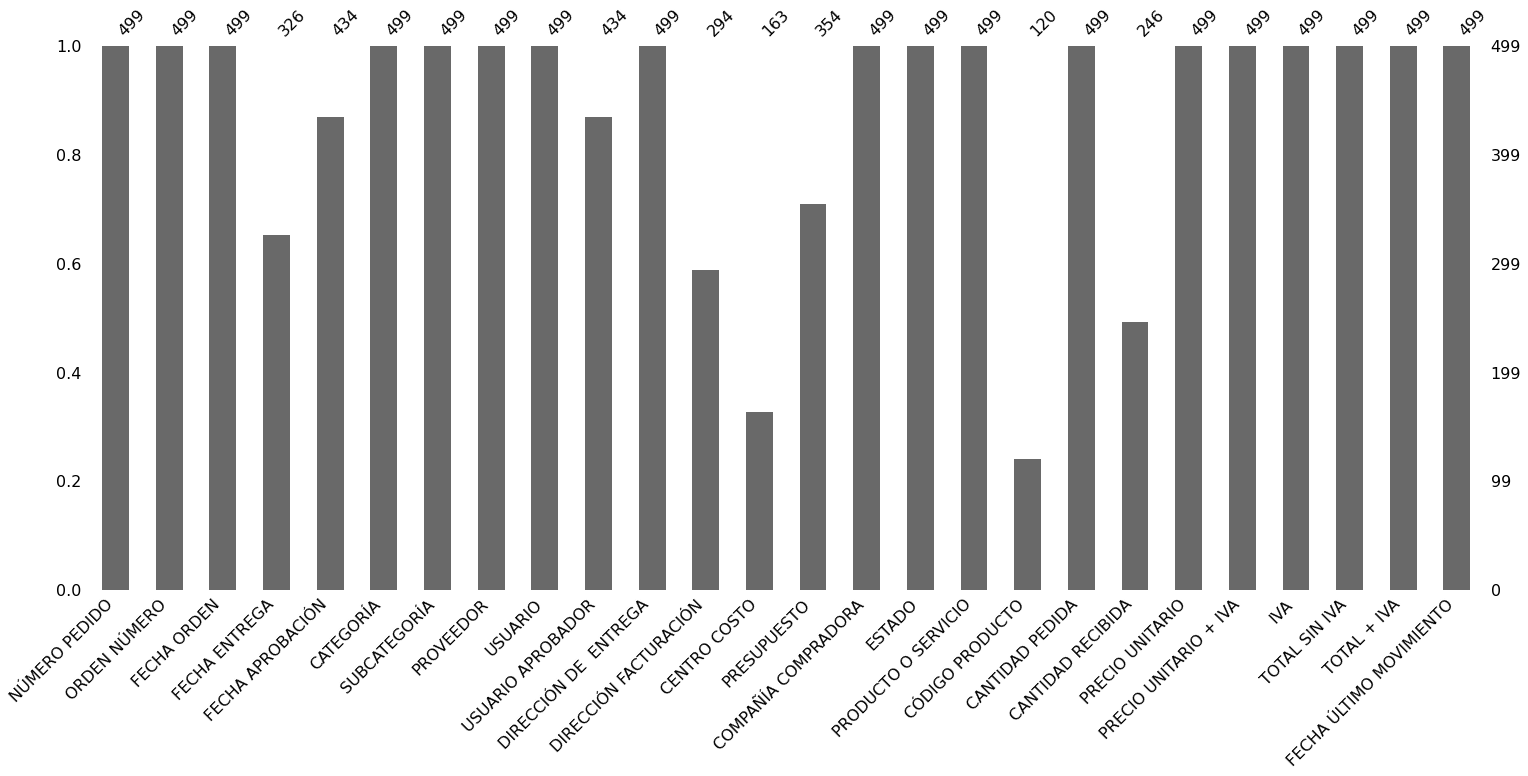

In [7]:
msn.bar(data);

In [8]:
data['CENTRO COSTO'].value_counts()

BODEGA                47
Centro de costos 3    32
Centro de costos 2    24
ALMACEN CENTRO        21
Oficina principal     10
Centro de costos 4    10
Oficina Principal      9
Centro de costos 1     9
006001                 1
Name: CENTRO COSTO, dtype: int64

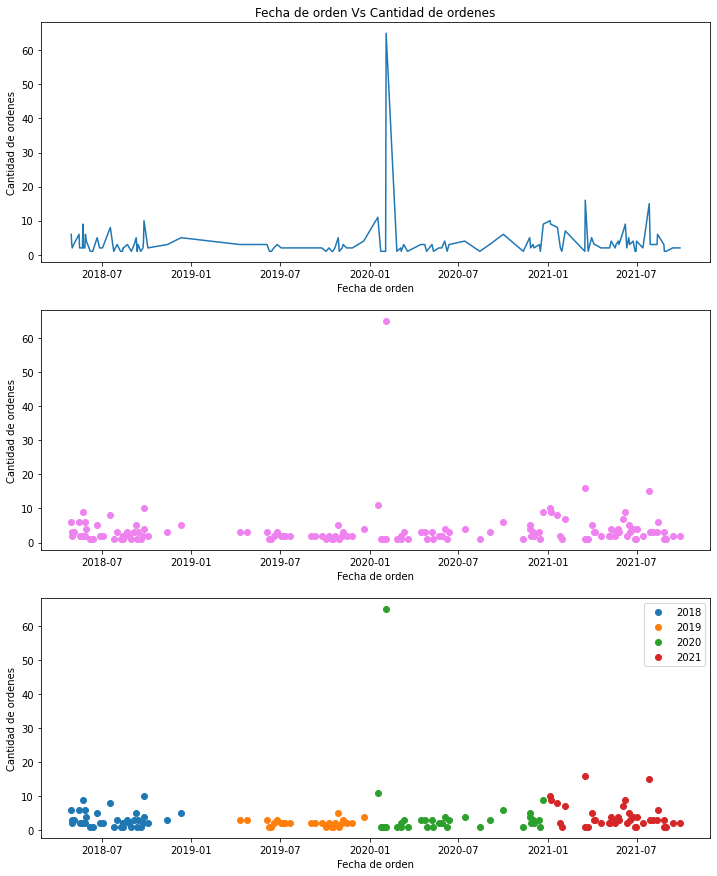

In [9]:
ordenes=data.groupby('FECHA ORDEN')['FECHA ORDEN'].count()
plt.figure(num=1,figsize=(12,15))
plt.subplot(311)
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.title('Fecha de orden Vs Cantidad de ordenes')
plt.plot(ordenes.index,ordenes);
plt.subplot(312)
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.scatter(ordenes.index,ordenes,c='violet');
plt.subplot(313)
mask2018 =  (ordenes.index <= '2018-12-31')
mask2019 = (ordenes.index> '2019-01-01') & (ordenes.index <= '2019-12-31')
mask2020 = (ordenes.index> '2020-01-01') & (ordenes.index <= '2020-12-31')
mask2021 = (ordenes.index> '2021-01-01') & (ordenes.index <= '2021-12-31')
plt.xlabel('Fecha de orden')
plt.ylabel('Cantidad de ordenes')
plt.scatter(ordenes.loc[mask2018].index,ordenes.loc[mask2018],label='2018');
plt.scatter(ordenes.loc[mask2019].index,ordenes.loc[mask2019],label='2019');
plt.scatter(ordenes.loc[mask2020].index,ordenes.loc[mask2020],label='2020');
plt.scatter(ordenes.loc[mask2021].index,ordenes.loc[mask2021],label='2021');
plt.legend();
plt.savefig('fecha_orden')

In [10]:
print('Fecha inicial datos: ',data['FECHA ORDEN'].min())
print('Fecha ultima orden dato: ',data['FECHA ORDEN'].max())
print('Cantidad de días de operación del portal de registros: ',data['FECHA ORDEN'].max()-data['FECHA ORDEN'].min())

Fecha inicial datos:  2018-04-30 00:00:00
Fecha ultima orden dato:  2021-09-28 00:00:00
Cantidad de días de operación del portal de registros:  1247 days 00:00:00


In [11]:
data['dias para aprobación']=data['FECHA APROBACIÓN']-data['FECHA ORDEN']

In [12]:
print('Dias promedio de aprobación: ',data['dias para aprobación'].mean(skipna=True).days);
print('Maximo de días para aprobación: ',data['dias para aprobación'].max().days);

Dias promedio de aprobación:  24
Maximo de días para aprobación:  573


In [14]:
fechas=data['FECHA ORDEN'].values
fechas=pd.to_datetime(fechas)
data['Año registro']=fechas.year

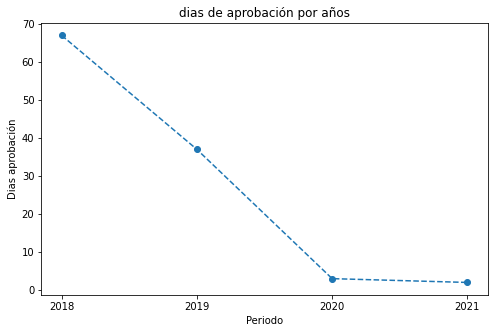

In [15]:
apro_2018=data.loc[data['Año registro']==2018,'dias para aprobación'].mean().days
apro_2019=data.loc[data['Año registro']==2019,'dias para aprobación'].mean().days
apro_2020=data.loc[data['Año registro']==2020,'dias para aprobación'].mean().days
apro_2021=data.loc[data['Año registro']==2021,'dias para aprobación'].mean().days
plt.figure(figsize=(8,5))
plt.plot(['2018','2019','2020','2021'],[apro_2018,apro_2019,apro_2020,apro_2021],'o--')
plt.title('dias de aprobación por años')
plt.ylabel('Dias aprobación')
plt.xlabel('Periodo');
plt.savefig('aprobación por años')

In [16]:
data['dias hasta entrega']=data['FECHA ENTREGA']-data['FECHA ORDEN']

In [17]:
print('Dias promedio de entrega: ',data['dias hasta entrega'].mean(skipna=True).days);
print('Maximo de días para entrega: ',data['dias hasta entrega'].max().days);

Dias promedio de entrega:  2
Maximo de días para entrega:  25


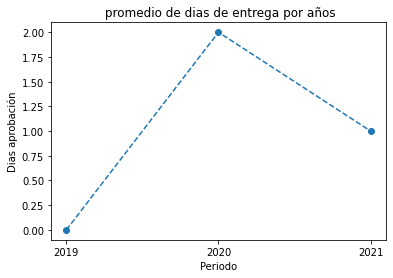

In [18]:
entre_2018=data.loc[data['Año registro']==2018,'dias hasta entrega'].mean().days
entre_2019=data.loc[data['Año registro']==2019,'dias hasta entrega'].mean().days
entre_2020=data.loc[data['Año registro']==2020,'dias hasta entrega'].mean().days
entre_2021=data.loc[data['Año registro']==2021,'dias hasta entrega'].mean().days
plt.plot(['2018','2019','2020','2021'],[entre_2018,entre_2019,entre_2020,entre_2021],'o--')
plt.title(' promedio de dias de entrega por años')
plt.ylabel('Dias aprobación')
plt.xlabel('Periodo');
plt.savefig('entrega por años')

In [19]:
def estado(año):
    _2018=[]
    _2019=[]
    _2020=[]
    _2021=[]
    for i in año:
        recibido=0
        ordenenproceso=0
        enviado=0
        rechazada=0
        finalizado=0
        recibidop=0
        cancelado=0
        ppaprobar=0
        labels=['Recibido', 'Orden en Proceso', 'Orden Rechazada',
           'Finalizado Incompleto', 'Recibido Parcial', 'Cancelado',
           'Pendiente por Aprobar', 'Enviado']

        for x in data['FECHA ORDEN']:
            estado=data.loc[data['FECHA ORDEN']==x,'ESTADO']
            if x >= pd.to_datetime(i+'-01-31') and x<=pd.to_datetime(i+'-12-31'):
                if estado.values[0]=='Recibido':
                    recibido+=1
                elif estado.values[0]=='Orden en Proceso':
                    ordenenproceso+=1
                elif estado.values[0]=='Enviado':
                    enviado+=1
                elif estado.values[0]=='Orden Rechazada':
                    rechazada+=1
                elif estado.values[0]=='Finalizado Incompleto':
                    finalizado+=1
                elif estado.values[0]=='Recibido Parcial':
                    recibidop+=1
                elif estado.values[0]=='Cancelado':
                    cancelado+=1
                elif estado.values[0]=='Pendiente por Aprobar':
                    ppaprobar+=1
        if i=='2018':
            _2018.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2019':
            _2019.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2020':
            _2020.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        if i=='2021':
            _2021.append([recibido,ordenenproceso,rechazada,finalizado,recibidop
                       ,cancelado,ppaprobar,enviado])
        
    datos=pd.DataFrame({'ESTADO':labels,
                       '2018':_2018[0],
                       '2019':_2019[0],
                       '2020':_2020[0],'2021':_2021[0]})
    datos[['ESTADO','2018','2019','2020','2021']].plot(x='ESTADO', kind='bar',figsize=(10,6))
    plt.title('Estados de las ordenes')
    plt.xticks(rotation=45)

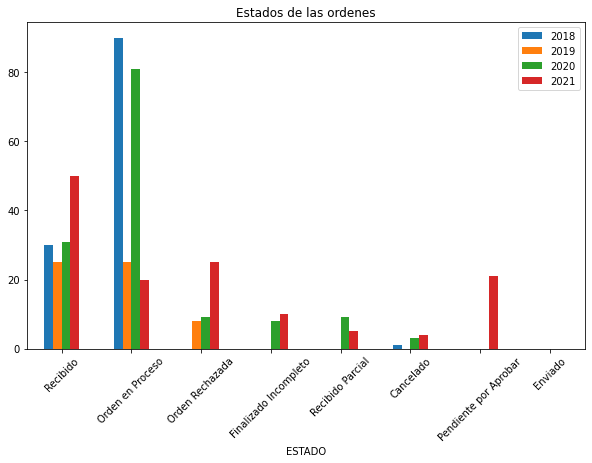

In [20]:
años=['2018','2019','2020','2021']
figure=estado(años)
plt.savefig('estado ordenes')

In [21]:
#Funcion para mostrar el comportamiento de ventas en el tiempo de las categorias
def categorias_func(categorias,num):
    plt.figure(figsize=(12,8))
    for i in range(num):
        idx=categorias[i]
        _data=data.loc[data['CATEGORÍA']==idx,'FECHA ORDEN'].sort_values(ascending=True).value_counts()
        _data=_data.sort_index()
        
        plt.plot(_data.index,_data.values,label=idx)
        plt.xlabel('Fechas')
        plt.ylabel('Cantidad de ordenes')
        plt.title('Categorias mas vendidas en el tiempo')
        plt.legend()  

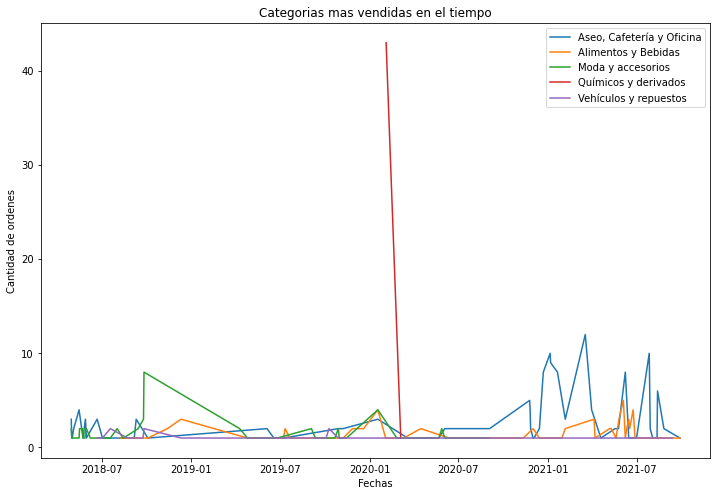

In [22]:
lista_categorias_=data['CATEGORÍA'].value_counts().index
categorias_func(lista_categorias_,5)
plt.savefig('categorias')

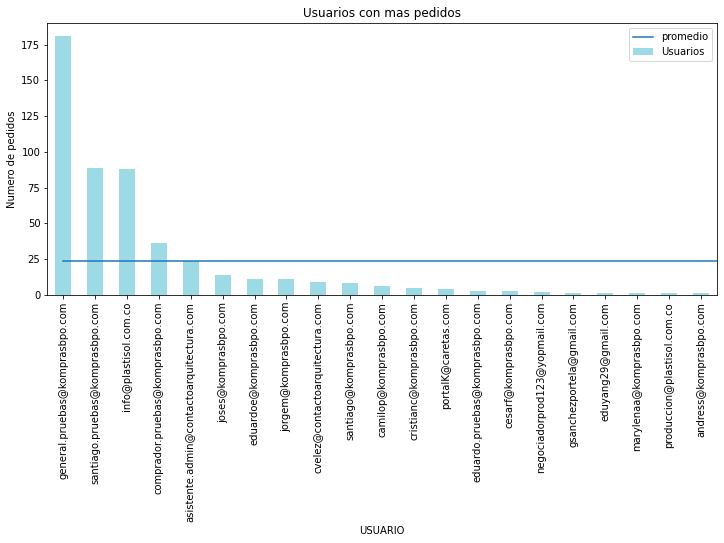

In [23]:
dat2=data.groupby(['USUARIO'])['NÚMERO PEDIDO'].count().sort_values(ascending=False)
dat2=pd.DataFrame(dat2)
plt.figure(figsize=(12,5))
plt.title('Usuarios con mas pedidos')
plt.xlabel('usuarios')
plt.ylabel('Numero de pedidos')
dat2['NÚMERO PEDIDO'].plot(kind='bar',colormap='tab20_r',label='Usuarios');
plt.plot([0,23],[dat2['NÚMERO PEDIDO'].mean(),dat2['NÚMERO PEDIDO'].mean()],label='promedio');
plt.legend();
plt.xticks(rotation=90)
plt.savefig('Usuarios')

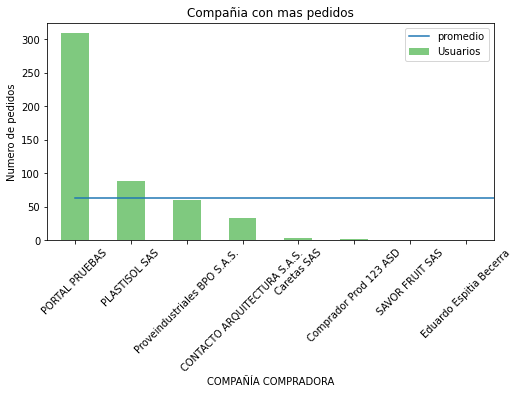

In [24]:
dat3=data.groupby(['COMPAÑÍA COMPRADORA'])['NÚMERO PEDIDO'].count().sort_values(ascending=False)
dat3=pd.DataFrame(dat3)
plt.figure(figsize=(8,4))
plt.title('Compañia con mas pedidos')
plt.xlabel('Compañia')
plt.ylabel('Numero de pedidos')
dat3['NÚMERO PEDIDO'].plot(kind='bar',colormap='Accent',label='Usuarios');
plt.plot([0,23],[dat3['NÚMERO PEDIDO'].mean(),dat3['NÚMERO PEDIDO'].mean()],label='promedio');
plt.xticks(rotation=45)
plt.legend();
plt.savefig('empresas')

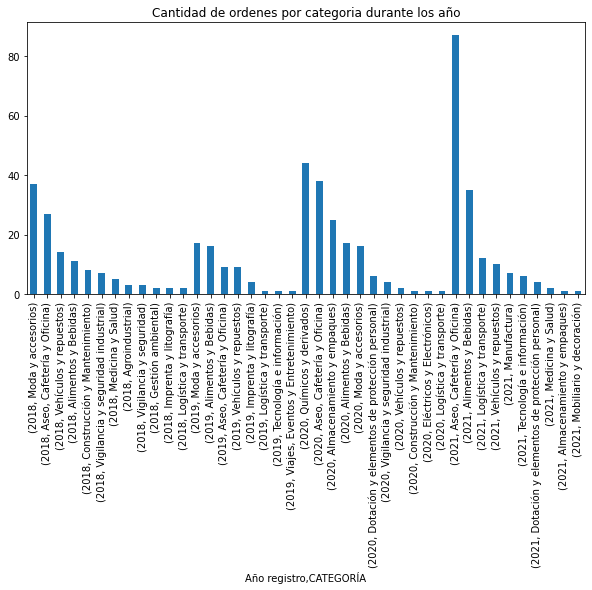

In [25]:
data.groupby('Año registro').CATEGORÍA.value_counts().plot(kind='bar',figsize=(10,5));
plt.title('Cantidad de ordenes por categoria durante los año');